In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
df=pd.read_csv('weatherAUS.csv')

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,ESE,17.0,17.0,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [5]:
df.shape

(145460, 23)

In [6]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [8]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [9]:
df.isna()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
2,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
4,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
145456,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
145457,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
145458,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df['Evaporation'].isnull().sum()

62790

In [11]:
print(df[df['Evaporation'].isnull()])

              Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0            NaN           W           44.0          W        WNW 

In [12]:
print(df[df.isnull()])

       Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0       NaN      NaN      NaN      NaN       NaN          NaN       NaN   
1       NaN      NaN      NaN      NaN       NaN          NaN       NaN   
2       NaN      NaN      NaN      NaN       NaN          NaN       NaN   
3       NaN      NaN      NaN      NaN       NaN          NaN       NaN   
4       NaN      NaN      NaN      NaN       NaN          NaN       NaN   
...     ...      ...      ...      ...       ...          ...       ...   
145455  NaN      NaN      NaN      NaN       NaN          NaN       NaN   
145456  NaN      NaN      NaN      NaN       NaN          NaN       NaN   
145457  NaN      NaN      NaN      NaN       NaN          NaN       NaN   
145458  NaN      NaN      NaN      NaN       NaN          NaN       NaN   
145459  NaN      NaN      NaN      NaN       NaN          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0              NaN        

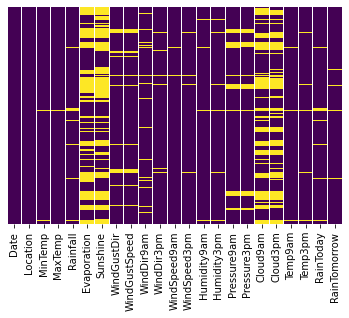

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

From above figure it is very clear that there are many missing values in complete dataset which has to be filled,which will be done in below steps.There are NAN values in both numerical and categorical feature.After filling the missing values,I will visualize the figure again so that can compare both figures.

In [14]:
df['Cloud9am'].unique

<bound method Series.unique of 0         8.0
1         NaN
2         NaN
3         NaN
4         7.0
         ... 
145455    NaN
145456    NaN
145457    NaN
145458    3.0
145459    8.0
Name: Cloud9am, Length: 145460, dtype: float64>

In [15]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Text(0.5, 1.0, 'Correlation Heatmap')

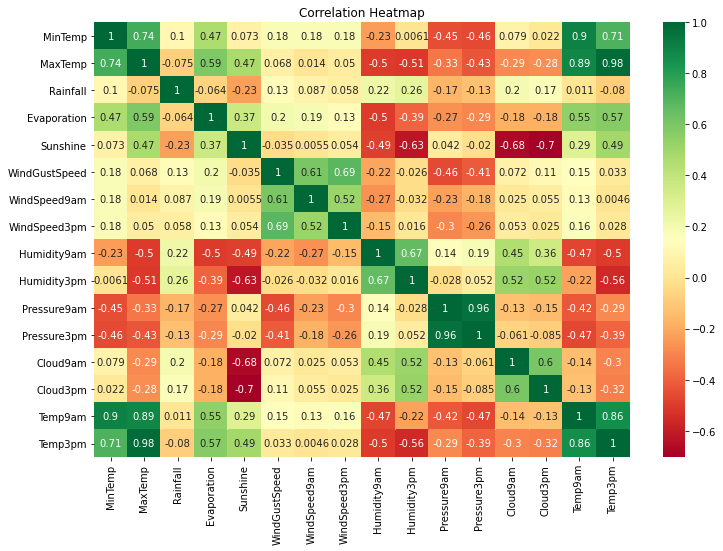

In [16]:
corr=df.corr()
plt.figure(figsize=(12,8))
heatmap=sns.heatmap(corr, cmap='RdYlGn', annot=True)
heatmap.set_title('Correlation Heatmap')

# FINDING OUTLIERS IN THE DATASET

In [17]:
def find_boundaries(df, variables):
    
    Q1=df[variables].quantile(0.25)
    Q3=df[variables].quantile(0.75)
    IQR=Q3-Q1
    lower_boundary = Q1-1.5*IQR
    upper_boundary = Q3+1.5*IQR
    return lower_boundary, upper_boundary

In [18]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [19]:
def plotvariable(df, variable):
    plt.figure(figsize=(16,4))
    plt.subplot(1,2,1)
    plt.hist(df[variable], alpha=0.5)
    
    plt.subplot(1,2,2)
    sns.boxplot(df[variable])
    plt.show

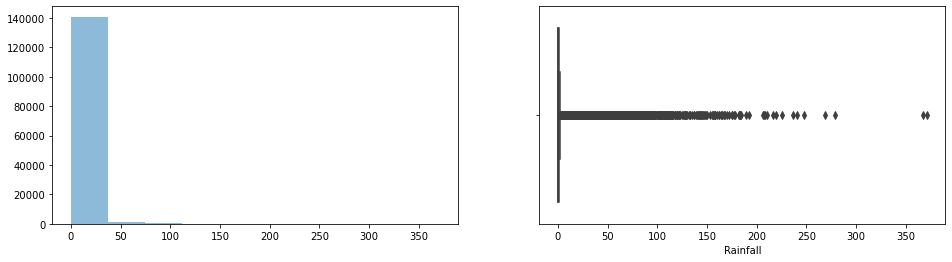

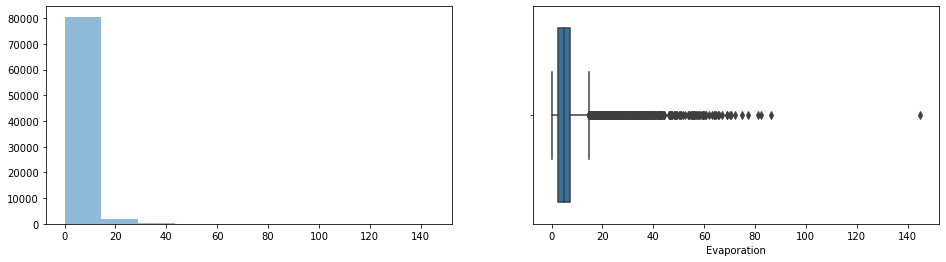

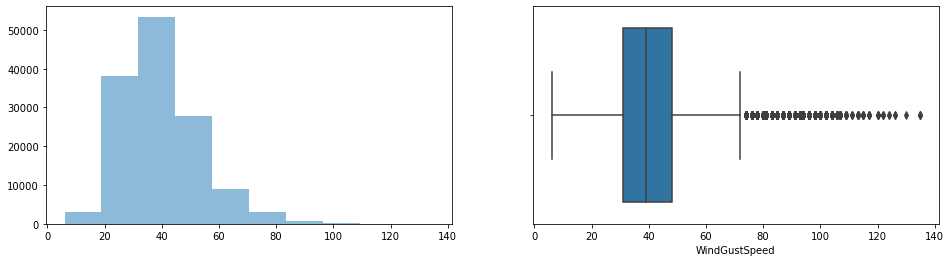

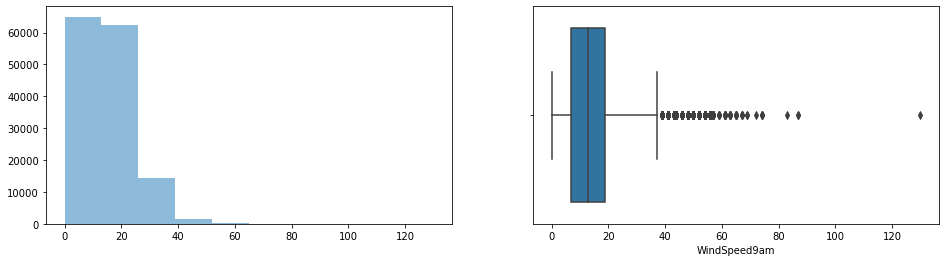

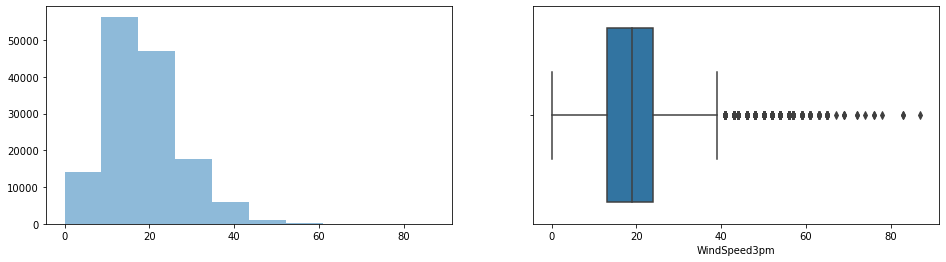

In [20]:
plotvariable(df, 'Rainfall')
plotvariable(df, 'Evaporation')
plotvariable(df, 'WindGustSpeed')
plotvariable(df, 'WindSpeed9am')
plotvariable(df, 'WindSpeed3pm')

In [21]:
lower_rainfall, upper_rainfall = find_boundaries(df, 'Rainfall')
print('upper limit for rainfall area is', upper_rainfall)
print('lower limit for rainfall area is', lower_rainfall)

upper limit for rainfall area is 2.0
lower limit for rainfall area is -1.2000000000000002


In [22]:
outliers_rainfall = np.where(df['Rainfall'] > upper_rainfall, True,
                            np.where(df['Rainfall'] < lower_rainfall, True, False))

In [23]:
outliers_rainfall

array([False, False, False, ..., False, False, False])

In [24]:
df.shape

(145460, 23)

In [25]:
eng_d = df.loc[~(outliers_rainfall),]

In [26]:
eng_d.shape

(119882, 23)

In [27]:
lower_evaporation, upper_evaporation = find_boundaries(df, 'Evaporation')
print('upper limit for evaporation area is', upper_evaporation)
print('lower limit for evaporation area is', lower_evaporation)

upper limit for evaporation area is 14.600000000000001
lower limit for evaporation area is -4.600000000000001


In [28]:
outliers_evaporation = np.where(df['Evaporation'] > upper_evaporation, True,
                               np.where(df['Evaporation'] < lower_evaporation,True,False))

In [29]:
outliers_evaporation

array([False, False, False, ..., False, False, False])

In [30]:
df.shape

(145460, 23)

In [31]:
eng_e = df.loc[~(outliers_evaporation),]

In [32]:
eng_e.shape

(143465, 23)

In [33]:
lower_wgustspeed, upper_wgustspeed = find_boundaries(df, 'WindGustSpeed')
print('upper limit for wgustspeed area is', upper_wgustspeed)
print('lower limit for whustspeed area is', lower_wgustspeed)

upper limit for wgustspeed area is 73.5
lower limit for whustspeed area is 5.5


In [34]:
outliers_wgustspeed = np.where(df['WindGustSpeed'] > upper_wgustspeed, True,
                               np.where(df['WindGustSpeed'] < lower_wgustspeed,True,False))

In [35]:
outliers_wgustspeed

array([False, False, False, ..., False, False, False])

In [36]:
df.shape

(145460, 23)

In [37]:
eng_wg = df.loc[~(outliers_wgustspeed),]

In [38]:
eng_wg.shape

(142368, 23)

In [39]:
lower_wspeed, upper_wspeed = find_boundaries(df, 'WindSpeed9am')
print('upper limit for windspeed area is', upper_wspeed)
print('lower limit for windspeed area is', lower_wspeed)

upper limit for windspeed area is 37.0
lower limit for windspeed area is -11.0


In [40]:
outliers_wspeed = np.where(df['WindSpeed9am'] > upper_wspeed, True,
                               np.where(df['WindSpeed9am'] < lower_wspeed,True,False))

In [41]:
outliers_wspeed

array([False, False, False, ..., False, False, False])

In [42]:
df.shape

(145460, 23)

In [43]:
eng_ws = df.loc[~(outliers_wspeed),]

In [44]:
eng_ws.shape

(143643, 23)

In [45]:
lower_wspeedp, upper_wspeedp = find_boundaries(df, 'WindSpeed3pm')
print('upper limit for windspeed3pm area is', upper_wspeedp)
print('lower limit for windspeed3pm area is', lower_wspeedp)
outliers_wspeedp = np.where(df['WindSpeed3pm'] > upper_wspeedp, True,
                               np.where(df['WindSpeed3pm'] < lower_wspeedp,True,False))


upper limit for windspeed3pm area is 40.5
lower limit for windspeed3pm area is -3.5


In [46]:
outliers_wspeedp

array([False, False, False, ..., False, False, False])

In [47]:
eng_wsp = df.loc[~(outliers_wspeedp),]

In [48]:
eng_wsp.shape

(142937, 23)

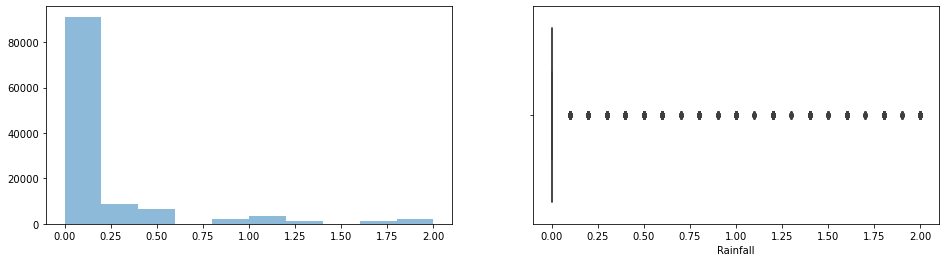

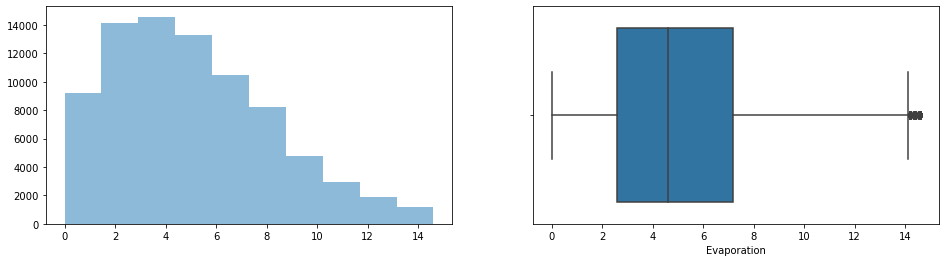

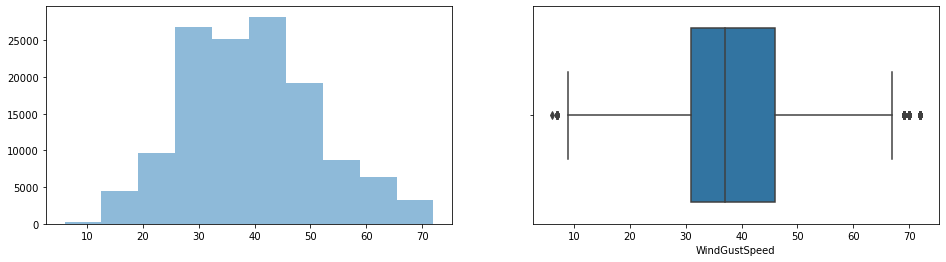

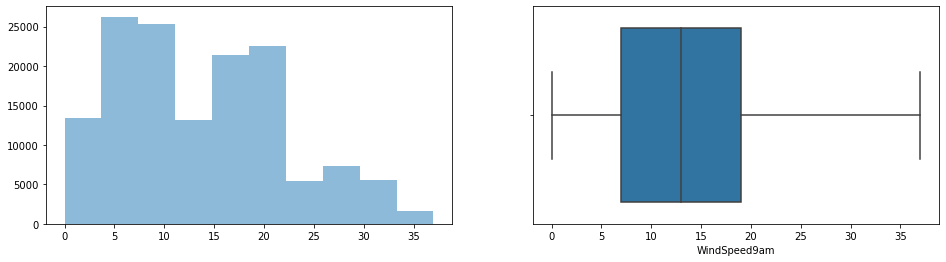

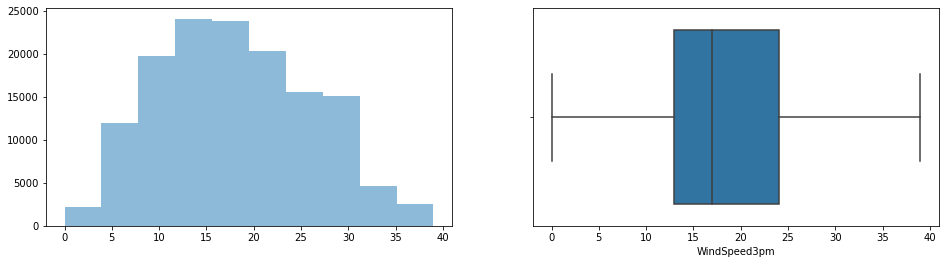

In [49]:
plotvariable(eng_d, 'Rainfall')
plotvariable(eng_e, 'Evaporation')
plotvariable(eng_wg, 'WindGustSpeed')
plotvariable(eng_ws, 'WindSpeed9am')
plotvariable(eng_wsp, 'WindSpeed3pm')

It is clear that there were outliers before and now I have removed the outliers. As you can see that,I performed separately every column to the removal of outliers so that everyone can understand in much deeper.There is an alternative way too removing the outliers.The main reason for removal of outliers is that it shouldn't effect the model that we are going to build and its mandatory to deal with outliers before building any model

# HANDLING NAN VALUES OF NUMERICAL FEATURES

In [50]:
df.fillna(df.median(),inplace=True)

In [51]:
df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

# HANDLING NAN VALUES OF CATEGORICAL FEATURES

In [52]:
missing_categorical=[var for var in df.columns if df[var].isnull().mean()>0 and df[var].dtypes=='O']
missing_categorical

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

In [53]:
df['WindDir9am'].isnull().mean()

0.07263852605527293

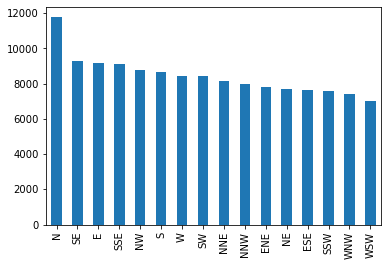

In [54]:
df['WindDir9am'].value_counts().plot.bar()

In [55]:
df['WindDir9am'].mode()

0    N
dtype: object

In [56]:
df['WindDir9am'].fillna('N',inplace=True)

In [57]:
df['WindDir3pm'].isnull().mean()

0.02906641000962464

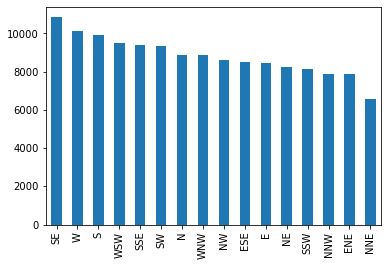

In [58]:
df['WindDir3pm'].value_counts().plot.bar()

In [59]:
df['WindDir3pm'].fillna('SE',inplace=True)

In [60]:
df['WindGustDir'].isnull().mean()

0.0709885879279527

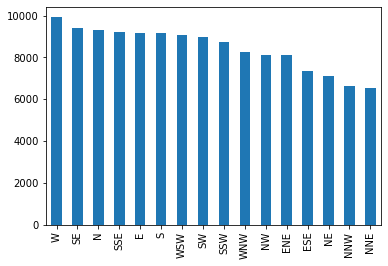

In [61]:
df['WindGustDir'].value_counts().plot.bar()

In [62]:
df['WindGustDir'].fillna('W',inplace=True)

In [63]:
df['RainToday'].isnull().mean()

0.022418534304963565

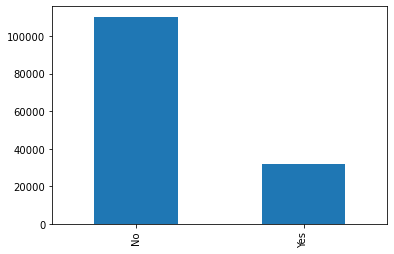

In [64]:
df['RainToday'].value_counts().plot.bar()

In [65]:
df['RainToday'].fillna('NO', inplace=True)

In [66]:
df.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow     3267
dtype: int64

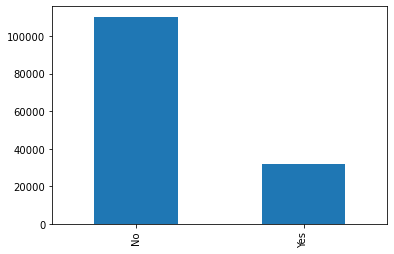

In [67]:
df['RainTomorrow'].value_counts().plot.bar()

In [68]:
df['RainTomorrow'].fillna('NO', inplace=True)

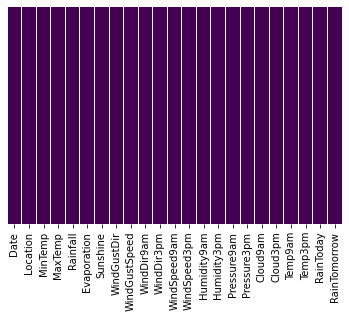

In [69]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

As I mentioned before that there were many nan values.By looking at the above the figure it is very much clear that there are no NAN values present in both Numerical and Categorical data.

# Conversion of Categorical features to Numerical features and Model Building

In [70]:
df['Date']=pd.to_datetime(df['Date'])

In [71]:
y=df['RainTomorrow']
X=df.drop(labels=['RainTomorrow','Date'], axis=1)

In [72]:
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [74]:
encode=OneHotEncoder()
scaler = MinMaxScaler()
from sklearn.compose import make_column_transformer, ColumnTransformer

In [75]:
X_train.select_dtypes('float').columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [76]:
num_cols=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm']

In [77]:
cat_cols=['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday']

In [78]:
column_transformer1 = ColumnTransformer(
[('cat_feat',encode,cat_cols),
('num_feat',scaler,num_cols)
],
remainder='passthrough')

In [79]:
X_train=column_transformer1.fit_transform(X_train)

In [80]:
X_test =column_transformer1.transform(X_test)

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
model=LogisticRegression()

In [83]:
model.fit(X_train,y_train)

LogisticRegression()

In [84]:
y_pred = model.predict(X_test)

In [85]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [86]:
accuracy_score(y_test, y_pred)

0.8368192991958668

In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          NO       0.67      0.48      0.56      1103
          No       0.86      0.95      0.90     36264
         Yes       0.73      0.50      0.59     10635

    accuracy                           0.84     48002
   macro avg       0.76      0.64      0.68     48002
weighted avg       0.83      0.84      0.82     48002



In this section I converted the categorical data to Numerical data,which is a must because the model can only understand the numerical data.By using onehotencoding I converted the categorical data to numerical data.By using of LogisticRegression the model can predict the Rainfall with 83% accuracy